In [5]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt

In [16]:



# Load multiple experiments
experiment_folder = '../outputs/regularization/2025-08-27_11-51-25'
data = []


for item in os.listdir(experiment_folder):
    if item.startswith('reg'):
        reg = float(item.split('_')[1])
        with open(f'{experiment_folder}/{item}/results.pkl', 'rb') as f:
            r = pickle.load(f)
            data.append({
                'model': r['config']['model']['type'],
                'clean_accuracy': r['performance']['clean_accuracy'],
                'poison_accuracy': r['performance']['poison_accuracy'],
                'regularization': r['config']['model']['regularization'],
                'class_0_poison_alignment': r['performance'].get('class_0_poison_alignment', None),
                'class_1_poison_alignment': r['performance'].get('class_1_poison_alignment', None),
            })


df = pd.DataFrame(data)

df = (
    df.assign(regularization=pd.to_numeric(df['regularization'], errors='coerce'))
      .dropna(subset=['regularization'])
      .query('regularization > 0')
      .sort_values('regularization', kind='mergesort')  # stable sort preserves row order within ties
)
print(df)


                model  clean_accuracy  poison_accuracy  regularization  \
71  linear_multiclass           0.535            0.540        0.000001   
61  linear_multiclass           0.480            0.515        0.000001   
63  linear_multiclass           0.480            0.495        0.000001   
65  linear_multiclass           0.470            0.495        0.000001   
67  linear_multiclass           0.465            0.500        0.000002   
..                ...             ...              ...             ...   
55  linear_multiclass           0.505            0.775        0.062800   
56  linear_multiclass           0.505            0.775        0.070500   
57  linear_multiclass           0.505            0.775        0.079200   
58  linear_multiclass           0.505            0.780        0.089000   
59  linear_multiclass           0.515            0.785        0.100000   

    class_0_poison_alignment  class_1_poison_alignment  
71                 -0.228635                  0.228635

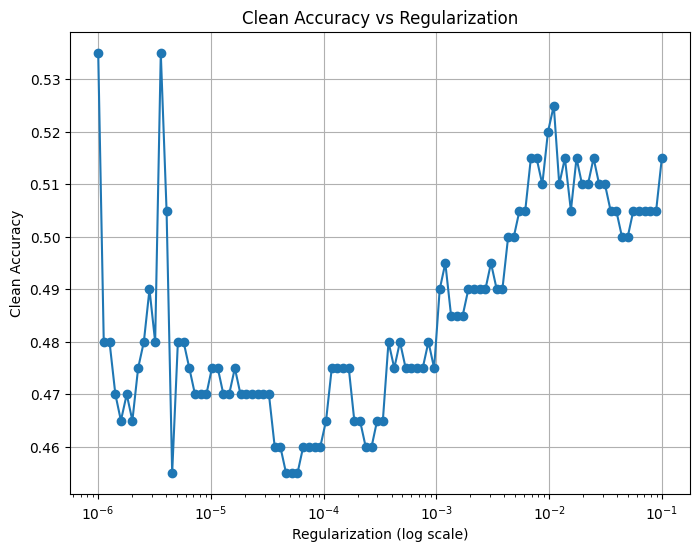

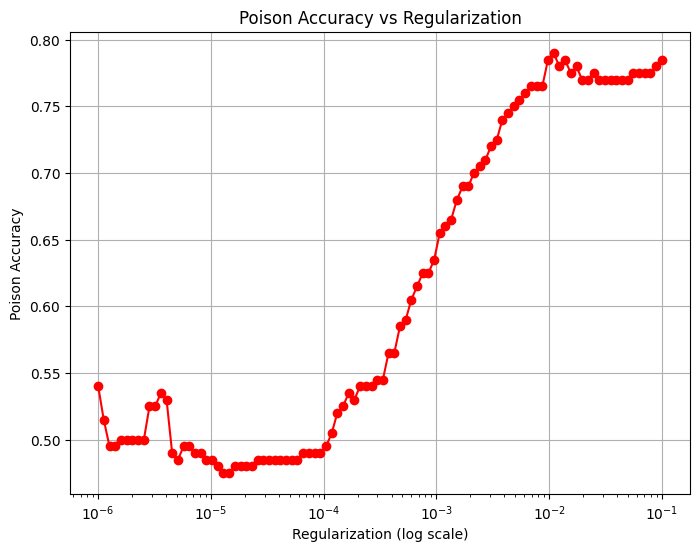

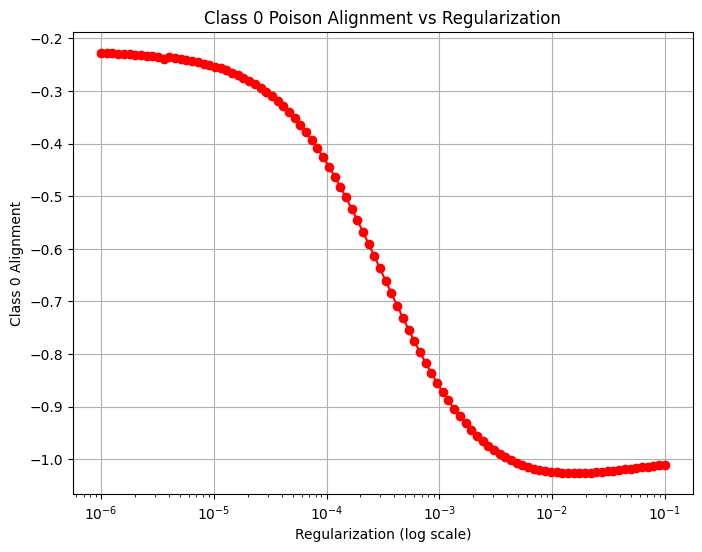

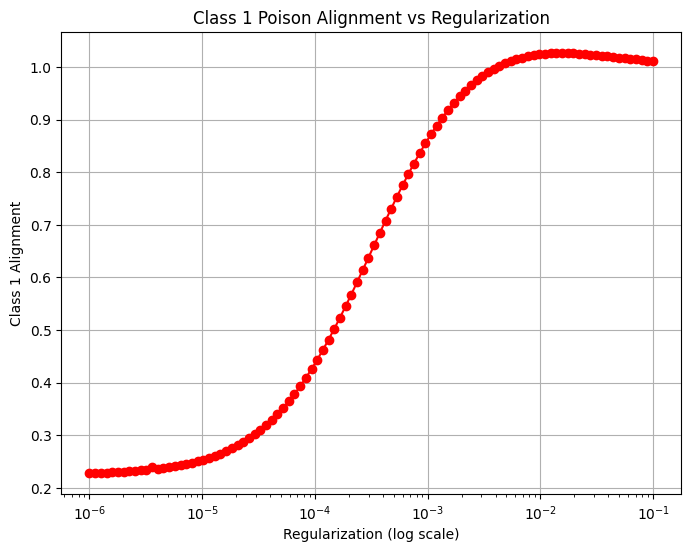

In [17]:

# Plot 1: Clean Accuracy vs Regularization
plt.figure(figsize=(8, 6))
plt.plot(df['regularization'], df['clean_accuracy'], marker='o')
plt.xscale('log')
plt.xlabel('Regularization (log scale)')
plt.ylabel('Clean Accuracy')
plt.title('Clean Accuracy vs Regularization')
plt.grid(True)
plt.show()

# Plot 2: Poison Accuracy vs Regularization
plt.figure(figsize=(8, 6))
plt.plot(df['regularization'], df['poison_accuracy'], marker='o', color='red')
plt.xscale('log')
plt.xlabel('Regularization (log scale)')
plt.ylabel('Poison Accuracy')
plt.title('Poison Accuracy vs Regularization')
plt.grid(True)
plt.show()

# Plot 2: Class 0 alignment vs Regularization
plt.figure(figsize=(8, 6))
plt.plot(df['regularization'], df['class_0_poison_alignment'], marker='o', color='red')
plt.xscale('log')
plt.xlabel('Regularization (log scale)')
plt.ylabel('Class 0 Alignment')
plt.title('Class 0 Poison Alignment vs Regularization')
plt.grid(True)
plt.show()

# Plot 2: Class 1 alignment vs Regularization
plt.figure(figsize=(8, 6))
plt.plot(df['regularization'], df['class_1_poison_alignment'], marker='o', color='red')
plt.xscale('log')
plt.xlabel('Regularization (log scale)')
plt.ylabel('Class 1 Alignment')
plt.title('Class 1 Poison Alignment vs Regularization')
plt.grid(True)
plt.show()
